## Descrição

Esse notebook foi construído para realizar os desafios propostos no final de cada aula do curso **Pandas: conhecendo a biblioteca**

## Aula 1: Conhecendo a base de dados

### Desafio 1
Importe o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) e armazene seu conteúdo em um DataFrame Pandas

In [239]:
import pandas as pd

In [240]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
dados = pd.read_csv(url)

### Desafio 2
Visualize as primeiras 7 linhas do DataFrame e as 5 últimas

In [241]:
dados.head(7)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True


In [242]:
dados.tail(5)

,Nome,Idade,Notas,Aprovado
13,Mirla,25,9.0,True
14,Paulo,37,NaN,False
15,Mylena,29,7.0,True
16,Lucas,33,NaN,False
17,Nadia,34,8.0,True


### Desafio 3
Confira a quantidade de linhas e colunas do DataFrame

In [243]:
dados.shape

(18, 4)

### Desafio 4
Explore as colunas do DataFrame e analise os tipos dos dados presentes em cada coluna

In [244]:
dados.columns

Index(['Nome', 'Idade', 'Notas', 'Aprovado'], dtype='object')

In [245]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nome      18 non-null     object 
 1   Idade     18 non-null     int64  
 2   Notas     12 non-null     float64
 3   Aprovado  18 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 578.0+ bytes


In [246]:
dados[['Nome', 'Idade', 'Notas', 'Aprovado']]

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,NaN,False


### **Extra**
Calcule algumas estatísticas descritivas básicas dos dados do DataFrame (média, desvio padrão, etc) - Dica: pesquise pelo método **describe**

In [247]:
descricao_estatistica = dados.describe()
print(descricao_estatistica)
#   O resultado exibe várias estatísticas descritivas para cada coluna do DataFrame. 
#   A contagem (count) mostra o número de valores não nulos em cada coluna, a média (mean) representa a média dos valores,
# o desvio padrão (std) é uma medida da dispersão dos valores em relação à média, o mínimo (min) e o máximo (max) indicam os valores mínimo e máximo, respectivamente.
# Os quartis (25%, 50% e 75%) fornecem informações sobre a distribuição dos dados.

#Outros parametros que podem ser passados a esse método describe():

#include e exclude: Esses parâmetros permitem especificar quais tipos de dados incluir ou excluir na análise. 
# Por exemplo, include='object' incluirá apenas colunas com tipo de dado objeto (strings), enquanto exclude=['int64'] excluirá as colunas com tipo de dado inteiro.

#percentiles: Por padrão, o método describe() calcula os quartis (25%, 50%, 75%).
# No entanto, você pode especificar quais percentis deseja calcular, passando uma lista de valores entre 0 e 1 para o parâmetro percentiles. 
# Por exemplo, percentiles=[0.1, 0.9] calculará o percentil 10 e o percentil 90, além dos quartis.

#datetime_is_numeric: Esse parâmetro, quando definido como True, trata as colunas de data e hora como valores numéricos para cálculos estatísticos. Por padrão, é definido como False.

#include_excludes e numeric_only: Esses parâmetros são usados em combinação para controlar quais estatísticas são calculadas para colunas numéricas. 
# Por exemplo, include_excludes={'number': ['mean', 'std']}, numeric_only=True calculará apenas a média e o desvio padrão para colunas numéricas.

#all: O parâmetro all=True retorna estatísticas adicionais, como contagem de valores únicos (unique), modo (top) e contagem do modo (freq).

           Idade      Notas
count  18.000000  12.000000
mean   25.500000   6.800000
std     6.070662   2.204953
min    18.000000   2.500000
25%    21.000000   5.450000
50%    24.500000   7.000000
75%    28.750000   8.250000
max    37.000000  10.000000


## Aula 2: Análise exploratória dos dados

Para os desafios dessa aula, vamos utilizar a mesma base de dados que estamos utilizando para o desenvolvimento do nosso projeto. Sendo assim, na célula abaixo vamos realizar a importação dessa base de dados e aplicar as transformações já realizadas até o momento da aula 2.

In [248]:
import pandas as pd

In [249]:
# importando a base de dados
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep=';')

In [250]:
imoveis_comerciais = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']
                      
# removendo imóveis comerciais
df = dados.query('@imoveis_comerciais not in Tipo')

# selecionando apenas imóveis do tipo apartamento
df = df.query('Tipo == "Apartamento"')

# visualizando a base de dados
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


### Desafio 1
Calcular a média de quartos por apartamento

In [251]:
media_quartos = df['Quartos'].mean()
media_quartos

2.481568707761622

### Desafio 2
Conferir quantos bairros únicos existem na nossa base de dados

In [252]:
bairros_unicos = df.Bairro.unique()


In [253]:
print(f'O número de bairros únicos existentes na nossa base de dados é {bairros_unicos.size}')

O número de bairros únicos existentes na nossa base de dados é 149


### Desafio 3
Analisar quais bairros possuem a média de valor de aluguel mais elevadas

In [254]:
media_aluguel_por_bairro = df.groupby('Bairro')['Valor'].mean()
max_media_aluguel = media_aluguel_por_bairro.max()
bairros_com_max_media_aluguel = media_aluguel_por_bairro[media_aluguel_por_bairro == max_media_aluguel]

print("Bairros com a média de valor de aluguel mais elevada:")
print(bairros_com_max_media_aluguel.index.tolist())

Bairros com a média de valor de aluguel mais elevada:
['Joá']


### Desafio 4
Criar um gráfico de barras verticais que apresente os 5 bairros com a média de valor de aluguel mais elevadas

In [255]:
cinco_bairros_media_valor_elevados = df.groupby('Bairro')[['Valor']].mean().sort_values('Valor').tail()

In [256]:
cinco_bairros_media_valor_elevados[::-1]#inverte a ordem

,Valor
Bairro,
Joá,15500.000000
Arpoador,12429.769231
Cidade Jardim,12000.000000
Ipanema,9487.205317
Botafogo,9369.207116


<Axes: xlabel='Bairro'>

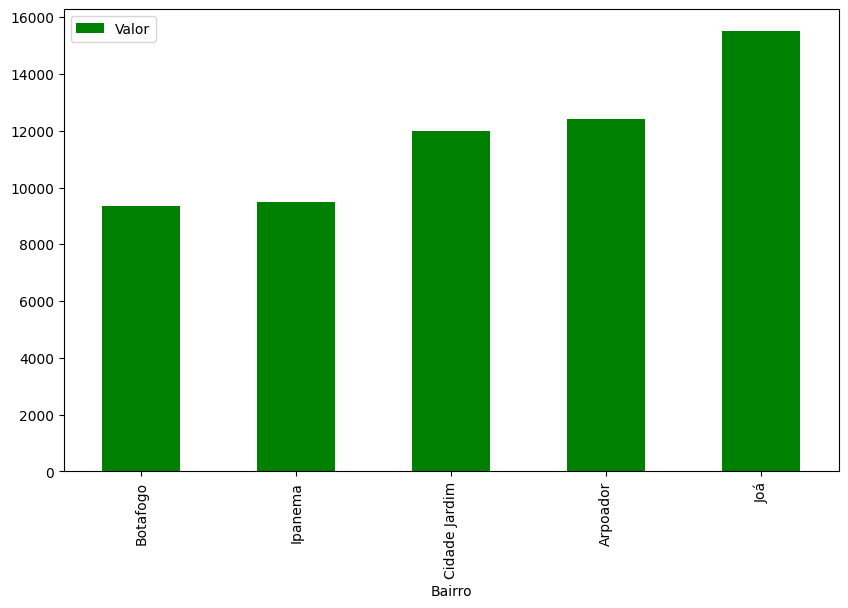

In [257]:
cinco_bairros_media_valor_elevados.plot(kind = 'bar', figsize=(10, 6), color='green')

## Aula 3

Importe novamente o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) para realizar os desafios abaixo.

In [258]:
# Importando novamente os dados
import pandas as pd

url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
dados_alunos = pd.read_csv(url)

### Desafio 1
Verifique se a base de dados possui dados nulos e caso tenha, realize o tratamento desses dados nulos

In [259]:
dados_alunos.isnull()

,Nome,Idade,Notas,Aprovado
0,False,False,False,False
1,False,False,True,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,True,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,True,False


In [260]:
dados_alunos.isnull().sum()

Nome        0
Idade       0
Notas       6
Aprovado    0
dtype: int64

In [261]:
dados_alunos = dados_alunos.fillna(0)
dados_alunos.isnull().sum()

Nome        0
Idade       0
Notas       0
Aprovado    0
dtype: int64

### Desafio 2
Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados

In [262]:
dados_alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,0.0,False


In [263]:
registros_a_remover = dados_alunos.query('Nome == "Alice" | Nome == "Carlos"').index

In [264]:
dados_alunos.drop(registros_a_remover, axis=0, inplace=True)
dados_alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
9,Vitor,28,0.0,False
10,Daniel,21,0.0,False
11,Igor,24,4.5,False


In [265]:
dados_alunos.query('Nome == "Alice" | Nome == "Carlos"')

,Nome,Idade,Notas,Aprovado


### Desafio 3
Aplique um filtro que selecione apenas os alunos que foram aprovados

In [266]:
dados_alunos.query('Aprovado == True')

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


In [267]:
alunos_aprovados = dados_alunos.query('Aprovado == True')
for nome in alunos_aprovados['Nome']:
    print(nome)


Ary
Beto
Dara
Sthefanie
Mirla
Mylena
Nadia


### Desafio 4
Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv"

In [268]:
alunos_aprovados.to_csv('alunos_aprovados.csv', index = False, sep=';')

In [269]:
pd.read_csv('alunos_aprovados.csv')

,Nome;Idade;Notas;Aprovado
0,Ary;20;7.5;True
1,Beto;21;10.0;True
2,Dara;21;7.0;True
3,Sthefanie;26;9.5;True
4,Mirla;25;9.0;True
5,Mylena;29;7.0;True
6,Nadia;34;8.0;True


In [270]:
pd.read_csv('alunos_aprovados.csv', sep=';')

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Beto,21,10.0,True
2,Dara,21,7.0,True
3,Sthefanie,26,9.5,True
4,Mirla,25,9.0,True
5,Mylena,29,7.0,True
6,Nadia,34,8.0,True


### **Extra**
Ao conferir as notas dos alunos aprovados, notamos que algumas notas estavam incorretas. As alunas que tiraram nota 7.0, na verdade tinham um ponto extra que não foi contabilizado. Sendo assim, substitua as notas 7.0 da base de dados por 8.0. **Dica**: pesquise pelo método **replace**

In [271]:
alunos_ponto_extra = alunos_aprovados.query('Notas == 7.0')

In [272]:
notas_atualizadas = alunos_ponto_extra.replace(7.0, 8.0)

In [273]:
notas_atualizadas

,Nome,Idade,Notas,Aprovado
6,Dara,21,8.0,True
15,Mylena,29,8.0,True


## Aula 4

Importe novamente o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) para realizar os desafios abaixo.

In [286]:
# Importando novamente os dados
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
dados = pd.read_csv(url)
dados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,NaN,False


### Desafio 1
Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles

In [287]:
dados['Pontos_extras'] = dados['Notas'] * 40 / 100
dados

,Nome,Idade,Notas,Aprovado,Pontos_extras
0,Ary,20,7.5,True,3.00
1,Ana,18,NaN,False,NaN
2,Cátia,27,2.5,False,1.00
3,Denis,18,5.0,False,2.00
4,Beto,21,10.0,True,4.00
5,Bruna,23,NaN,False,NaN
6,Dara,21,7.0,True,2.80
7,Carlos,19,6.0,True,2.40
8,Alice,35,5.6,False,2.24
9,Vitor,28,NaN,False,NaN


### Desafio 2
Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras

In [288]:
dados['Notas_finais'] = dados['Notas'] + dados['Pontos_extras']
dados.head()

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais
0,Ary,20,7.5,True,3.0,10.5
1,Ana,18,NaN,False,NaN,NaN
2,Cátia,27,2.5,False,1.0,3.5
3,Denis,18,5.0,False,2.0,7.0
4,Beto,21,10.0,True,4.0,14.0


### Desafio 3
Como os alunos ganharam pontos extras, alguns que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:

* True: caso o aluno esteja aprovado (nota final deve ser maior ou igual a 6);
* False: caso o aluno esteja reprovado (nota final deve ser menor que 6).


In [317]:
dados['Aprovado_final'] = dados['Notas_finais'].apply(lambda x: "True" if x >=6 else "False")
dados_novos = dados
dados_novos

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
0,Ary,20,7.5,True,3.00,10.50,True
1,Ana,18,NaN,False,NaN,NaN,False
2,Cátia,27,2.5,False,1.00,3.50,False
3,Denis,18,5.0,False,2.00,7.00,True
4,Beto,21,10.0,True,4.00,14.00,True
5,Bruna,23,NaN,False,NaN,NaN,False
6,Dara,21,7.0,True,2.80,9.80,True
7,Carlos,19,6.0,True,2.40,8.40,True
8,Alice,35,5.6,False,2.24,7.84,True
9,Vitor,28,NaN,False,NaN,NaN,False


### Desafio 4
Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras

In [325]:
dados_novos['Aprovado'] = dados_novos['Aprovado'].astype(str)
dados_novos['Aprovado_final'] = dados_novos['Aprovado_final'].astype(str)
alunos_nao_aprovados_anteriormente = dados_novos.query('Aprovado == "False" & Aprovado_final == "True"')
alunos_nao_aprovados_anteriormente

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
1,Ana,18,NaN,False,NaN,NaN,True
2,Cátia,27,2.5,False,1.00,3.50,True
3,Denis,18,5.0,False,2.00,7.00,True
5,Bruna,23,NaN,False,NaN,NaN,True
8,Alice,35,5.6,False,2.24,7.84,True
9,Vitor,28,NaN,False,NaN,NaN,True
10,Daniel,21,NaN,False,NaN,NaN,True
11,Igor,24,4.5,False,1.80,6.30,True
14,Paulo,37,NaN,False,NaN,NaN,True
16,Lucas,33,NaN,False,NaN,NaN,True


In [324]:
# Converter as colunas 'Aprovado' e 'Aprovado_final' para o tipo bool
dados_novos['Aprovado'] = dados_novos['Aprovado'].astype(bool)
dados_novos['Aprovado_final'] = dados_novos['Aprovado_final'].astype(bool)

# Filtrar os alunos que não foram aprovados anteriormente, mas foram aprovados após a soma dos pontos extras
alunos_aprovados_extra = dados_novos[(dados_novos['Aprovado'] == False) & (dados_novos['Aprovado_final'] == True)]

# Exibir os alunos que não foram aprovados anteriormente, mas foram aprovados após a soma dos pontos extras
alunos_aprovados_extra


,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
1,Ana,18,NaN,False,NaN,NaN,True
2,Cátia,27,2.5,False,1.00,3.50,True
3,Denis,18,5.0,False,2.00,7.00,True
5,Bruna,23,NaN,False,NaN,NaN,True
8,Alice,35,5.6,False,2.24,7.84,True
9,Vitor,28,NaN,False,NaN,NaN,True
10,Daniel,21,NaN,False,NaN,NaN,True
11,Igor,24,4.5,False,1.80,6.30,True
14,Paulo,37,NaN,False,NaN,NaN,True
16,Lucas,33,NaN,False,NaN,NaN,True
